# Pirmas mini projektas - Lietuvos demografija

Demografija, tai mokslas, tiriantis gyventojų skaičių, sudėtį, teritorinį pasiskirstymą, jų pokyčius, pokyčių priežastis bei padarinius, analizuojantis demografinius procesus (gimstamumas, mirtingumas, migracija) ir jų sąveiką su ekonominiais, socialiniais, politiniais, ekologiniais ir kitais veiksniais. Kartais visuomenėje demografija vadinama tik gyventojų skaičiaus statistika.

https://lt.wikipedia.org/wiki/Demografija

Kadangi pirmojo mini projekto tema yra su Lietuva, susijusių duomenų tyrimas. Šiam darbui buvo pasirinkta išanalizuoti Lietuvos pupoliaciją rodančius duomenis.

Duomenų šaltinis, oficialus statistikos portalas: https://osp.stat.gov.lt/

Tyrimui išsikelti 3 klausimai:
    1. Kuriose Lietuvos apskrityse ar savivaldybėse yra didžiausias lyčių skirtumas, 2019 metais?
    2. Kokio amžiaus žmonių 2019 metais Lietuvoje daugiausia (bendras, vyrų, moterų)?
    3. Kaip ateityje kis Lietuvos miestų ir kaimų gyventojų skaičius (MM)?

## 1. Kuriose Lietuvos apskrityse ar savivaldybėse yra didžiausias lyčių skirtumas, 2019 metais?

In [1]:

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Visų pirma nuskaitomi, sutvarkomi ir išvedami darbui reikalingi duomenys. Duomenų failai yra parsiųsti į kompiuterį ir nuskaitomi iš failo, norint išvengti duomenų praradimo (pvz. serverio, interneto problemos).

### Lietuvos gyventojų demografiniai duomenys 2019 metais

In [2]:
fileA = pd.read_excel('2019.xls', sheet_name='Iš viso', skiprows=8)
fileA.rename(columns={'Unnamed: 0': 'Gyvenvietės', 'Unnamed: 1': 'Iš viso'}, inplace=True)
fileA.dropna(inplace=True)
fileA

,Gyvenvietės,Iš viso,0,1,2,3,4,5,6,7,...,40–44,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80–84,≥85
0,Iš viso,2794184.0,28166.0,28894.0,30380.0,30724.0,29537.0,28822.0,29119.0,28815.0,...,176104.0,198150.0,203195.0,221849.0,188045.0,155351.0,119763.0,115720.0,89469.0,72070.0
1,"Miesto gyventojai¹,²",1875370.0,19628.0,20351.0,21616.0,21208.0,20370.0,19466.0,20659.0,19723.0,...,120231.0,128969.0,129077.0,145533.0,126176.0,105028.0,80844.0,76850.0,59059.0,48425.0
2,"Kaimo gyventojai¹,²",918814.0,8538.0,8543.0,8764.0,9516.0,9167.0,9356.0,8460.0,9092.0,...,55873.0,69181.0,74118.0,76316.0,61869.0,50323.0,38919.0,38870.0,30410.0,23645.0
3,Sostinės regionas,810538.0,9377.0,9506.0,10033.0,9767.0,9425.0,8877.0,9045.0,9132.0,...,57246.0,55277.0,51674.0,56744.0,48107.0,40551.0,30554.0,27368.0,21839.0,16978.0
4,Vilniaus apskritis,810538.0,9377.0,9506.0,10033.0,9767.0,9425.0,8877.0,9045.0,9132.0,...,57246.0,55277.0,51674.0,56744.0,48107.0,40551.0,30554.0,27368.0,21839.0,16978.0
5,Miesto gyventojai,639871.0,7726.0,7862.0,8384.0,7999.0,7774.0,7181.0,7474.0,7377.0,...,45304.0,42352.0,38719.0,43116.0,37234.0,31403.0,24100.0,21439.0,17113.0,13442.0
6,Kaimo gyventojai,170667.0,1651.0,1644.0,1649.0,1768.0,1651.0,1696.0,1571.0,1755.0,...,11942.0,12925.0,12955.0,13628.0,10873.0,9148.0,6454.0,5929.0,4726.0,3536.0
7,Elektrėnų sav.,23687.0,225.0,241.0,252.0,274.0,253.0,237.0,249.0,227.0,...,1478.0,1834.0,1790.0,2070.0,1619.0,1299.0,994.0,1002.0,733.0,472.0
8,Miesto gyventojai,15775.0,163.0,160.0,159.0,181.0,179.0,157.0,188.0,151.0,...,989.0,1191.0,1166.0,1422.0,1106.0,834.0,684.0,644.0,488.0,289.0
9,Elektrėnai,11269.0,123.0,119.0,115.0,135.0,120.0,116.0,142.0,110.0,...,658.0,826.0,875.0,1082.0,834.0,562.0,494.0,467.0,365.0,198.0


### Lietuvoje gyvenančių vyrų demografiniai duomenys 2019 metais

In [3]:
fileM = pd.read_excel('2019.xls', sheet_name='Vyrai', skiprows=8)
fileM.rename(columns={'Unnamed: 0': 'Gyvenvietės', 'Unnamed: 1': 'Iš viso'}, inplace=True)
fileM.dropna(inplace=True)
fileM

,Gyvenvietės,Iš viso,0,1,2,3,4,5,6,7,...,40–44,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80–84,≥85
0,Iš viso,1295591.0,14364.0,14866.0,15719.0,15784.0,15162.0,14666.0,14880.0,14893.0,...,87125.0,96254.0,96263.0,101577.0,81572.0,62020.0,43246.0,37689.0,25937.0,17430.0
1,"Miesto gyventojai¹, ²",841872.0,10000.0,10506.0,11255.0,10975.0,10465.0,9918.0,10502.0,10102.0,...,58014.0,60664.0,57930.0,62623.0,51524.0,39101.0,27616.0,24387.0,16807.0,11749.0
2,"Kaimo gyventojai¹, ²",453719.0,4364.0,4360.0,4464.0,4809.0,4697.0,4748.0,4378.0,4791.0,...,29111.0,35590.0,38333.0,38954.0,30048.0,22919.0,15630.0,13302.0,9130.0,5681.0
3,Sostinės regionas,373951.0,4882.0,4944.0,5213.0,5075.0,4890.0,4533.0,4637.0,4724.0,...,28159.0,26719.0,24083.0,24926.0,20072.0,15547.0,10566.0,8931.0,6342.0,4217.0
4,Vilniaus apskritis,373951.0,4882.0,4944.0,5213.0,5075.0,4890.0,4533.0,4637.0,4724.0,...,28159.0,26719.0,24083.0,24926.0,20072.0,15547.0,10566.0,8931.0,6342.0,4217.0
5,Miesto gyventojai,289683.0,4009.0,4120.0,4368.0,4131.0,4035.0,3658.0,3798.0,3818.0,...,21799.0,20122.0,17430.0,18204.0,14906.0,11450.0,8001.0,6929.0,5012.0,3461.0
6,Kaimo gyventojai,84268.0,873.0,824.0,845.0,944.0,855.0,875.0,839.0,906.0,...,6360.0,6597.0,6653.0,6722.0,5166.0,4097.0,2565.0,2002.0,1330.0,756.0
7,Elektrėnų sav.,11545.0,116.0,120.0,131.0,137.0,120.0,126.0,132.0,120.0,...,825.0,957.0,916.0,992.0,745.0,553.0,376.0,333.0,192.0,118.0
8,Miesto gyventojai,7607.0,85.0,80.0,92.0,88.0,88.0,83.0,99.0,82.0,...,548.0,639.0,572.0,642.0,478.0,343.0,256.0,205.0,129.0,77.0
9,Elektrėnai,5484.0,61.0,65.0,62.0,69.0,59.0,54.0,68.0,57.0,...,386.0,457.0,432.0,475.0,376.0,223.0,179.0,163.0,97.0,56.0


### Lietuvoje gyvenančių moterų demografiniai duomenys 2019 metais

In [4]:
fileW = pd.read_excel('2019.xls', sheet_name='Moterys', skiprows=8)
fileW.rename(columns={'Unnamed: 0': 'Gyvenvietės', 'Unnamed: 1': 'Iš viso'}, inplace=True)
fileW.dropna(inplace=True)
fileW

,Gyvenvietės,Iš viso,0,1,2,3,4,5,6,7,...,40–44,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80–84,≥85
0,Iš viso,1498593.0,13802.0,14028.0,14661.0,14940.0,14375.0,14156.0,14239.0,13922.0,...,88979.0,101896.0,106932.0,120272.0,106473.0,93331.0,76517.0,78031.0,63532.0,54640.0
1,"Miesto gyventojai¹, ²",1033498.0,9628.0,9845.0,10361.0,10233.0,9905.0,9548.0,10157.0,9621.0,...,62217.0,68305.0,71147.0,82910.0,74652.0,65927.0,53228.0,52463.0,42252.0,36676.0
2,"Kaimo gyventojai¹, ²",465095.0,4174.0,4183.0,4300.0,4707.0,4470.0,4608.0,4082.0,4301.0,...,26762.0,33591.0,35785.0,37362.0,31821.0,27404.0,23289.0,25568.0,21280.0,17964.0
3,Sostinės regionas,436587.0,4495.0,4562.0,4820.0,4692.0,4535.0,4344.0,4408.0,4408.0,...,29087.0,28558.0,27591.0,31818.0,28035.0,25004.0,19988.0,18437.0,15497.0,12761.0
4,Vilniaus apskritis,436587.0,4495.0,4562.0,4820.0,4692.0,4535.0,4344.0,4408.0,4408.0,...,29087.0,28558.0,27591.0,31818.0,28035.0,25004.0,19988.0,18437.0,15497.0,12761.0
5,Miesto gyventojai,350188.0,3717.0,3742.0,4016.0,3868.0,3739.0,3523.0,3676.0,3559.0,...,23505.0,22230.0,21289.0,24912.0,22328.0,19953.0,16099.0,14510.0,12101.0,9981.0
6,Kaimo gyventojai,86399.0,778.0,820.0,804.0,824.0,796.0,821.0,732.0,849.0,...,5582.0,6328.0,6302.0,6906.0,5707.0,5051.0,3889.0,3927.0,3396.0,2780.0
7,Elektrėnų sav.,12142.0,109.0,121.0,121.0,137.0,133.0,111.0,117.0,107.0,...,653.0,877.0,874.0,1078.0,874.0,746.0,618.0,669.0,541.0,354.0
8,Miesto gyventojai,8168.0,78.0,80.0,67.0,93.0,91.0,74.0,89.0,69.0,...,441.0,552.0,594.0,780.0,628.0,491.0,428.0,439.0,359.0,212.0
9,Elektrėnai,5785.0,62.0,54.0,53.0,66.0,61.0,62.0,74.0,53.0,...,272.0,369.0,443.0,607.0,458.0,339.0,315.0,304.0,268.0,142.0


Gautą informaciją apdirbame ir surandame 10 gyvenviečių su didžiausia lyčių nelygybe.

### Pirmojo klausimo, rezultatų lentelė - rodanti kuriose gyvenvietėse yra didžiausias lyčių skirtumas

In [5]:
dfA = pd.DataFrame({"Gyvenvietės":fileA['Gyvenvietės'],"Vyrai":fileM['Iš viso'],"Moterys":fileW['Iš viso'],
                    "Skirtumas":fileW['Iš viso'] - fileM['Iš viso']})
dfA = dfA.sort_values('Skirtumas', ascending=False)
dfA = dfA.head(10)
coldict = {'Skirtumas':'#d9d9d9'}

def highlight_cols(s, coldict):
    if s.name in coldict.keys():
        return ['background-color: {}'.format(coldict[s.name])] * len(s)
    return [''] * len(s)
dfA.style.apply(highlight_cols, coldict=coldict)

,Gyvenvietės,Vyrai,Moterys,Skirtumas
0,Iš viso,1.29559e+06,1.49859e+06,203002
1,"Miesto gyventojai¹,²",841872,1.0335e+06,191626
47,Vidurio ir vakarų Lietuvos regionas,921640,1.06201e+06,140366
3,Sostinės regionas,373951,436587,62636
4,Vilniaus apskritis,373951,436587,62636
5,Miesto gyventojai,289683,350188,60505
38,Vilniaus m. sav.,249556,302575,53019
39,Miesto gyventojai,249497,302440,52943
41,Vilnius,244339,296873,52534
70,Kauno apskritis,257244,304186,46942


### Pirmojo klausimo, rezultatų diagrama - lyčių skirtumas

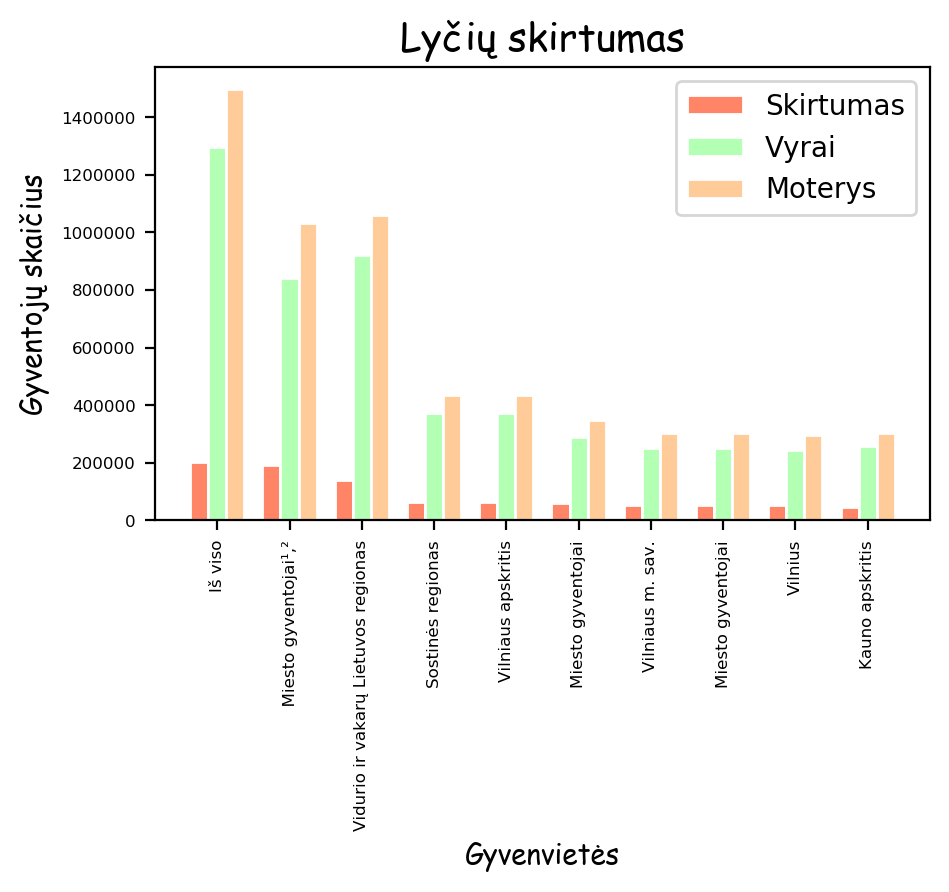

In [6]:
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(dfA['Skirtumas']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Resize your Graph
plt.figure(figsize=(5,3), dpi=200)
# Make the plot
plt.bar(r1, dfA['Skirtumas'], color='#ff8566', width=barWidth, edgecolor='white', label='Skirtumas')
plt.bar(r2, dfA['Vyrai'], color='#b3ffb3', width=barWidth, edgecolor='white', label='Vyrai')
plt.bar(r3, dfA['Moterys'], color='#ffcc99', width=barWidth, edgecolor='white', label='Moterys')
 
# Add xticks on the middle of the group bars
plt.title('Lyčių skirtumas', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 14})
plt.xlabel('Gyvenvietės', {'fontname': 'Comic Sans MS', 'fontsize': 10})
plt.ylabel('Gyventojų skaičius', {'fontname': 'Comic Sans MS', 'fontsize': 10})
plt.xticks([r + barWidth for r in range(len(dfA['Skirtumas']))], dfA['Gyvenvietės'], rotation='vertical')
plt.tick_params(labelsize=6)
 
# Create legend & Show graphic
plt.legend()
plt.show()

Atlikus pirmąjį tyrimą, galima pastebėti, kad visose didžiausią lyčių nelygybę turinčiose gyvenvietėse dominuoja moterys.
Didžiausias skirtumas matomas tarp miesto gyventojų, čia moterų net 191626 daugiau nei vyrų.
Antroje ir trečioje vietose yra vidurio ir vakarų Lietuvos ir sostinės regionai, čia atitinikamai 140366, 62636 moterų daugiau nei vyrų.

## 2. Kokio amžiaus žmonių 2019 metais Lietuvoje daugiausia (bendras, vyrų, moterų)?

Antramjam tyrimui pasinaudosime tais pačiais 2019 metų duomenimis.

In [7]:
agemaxA = fileA.iloc[0,2:]
agemaxA = agemaxA.sort_values(ascending=False)
agemaxA = agemaxA.head(10)
agemaxA = agemaxA.sort_index()

labels = agemaxA.index
valuesA = agemaxA.values

In [8]:
agemaxM = fileM.iloc[0,2:]
agemaxM = agemaxM.sort_values(ascending=False)
agemaxM = agemaxM.head(10)
agemaxM = agemaxM.sort_index()

labels = agemaxM.index
valuesM = agemaxM.values

In [9]:
agemaxW = fileW.iloc[0,2:]
agemaxW = agemaxW.sort_values(ascending=False)
agemaxW = agemaxW.head(10)
agemaxW = agemaxW.sort_index()

labels = agemaxW.index
valuesW = agemaxW.values

Atlikus duomenų tyrimą buvo rastos 10 amžiaus grupių su didžiausiais gyventojų kiekiais.

### Antrojo klausimo, rezultatų lentelė - gyventojų skaičius, surykiuota pagal amžiaus grupę

In [10]:
df=pd.DataFrame({"Amžius":labels, "Gyventojai":valuesA, "Vyrai":valuesM, "Moterys":valuesW}) 
coldict = {'Gyventojai':'#d9d9d9','Vyrai':'#809fff','Moterys':'#ff4d94'}
df.style.apply(highlight_cols, coldict=coldict)

,Amžius,Gyventojai,Vyrai,Moterys
0,30–34,183846,95412,88434
1,35–39,166624,85415,81209
2,40–44,176104,87125,88979
3,45–49,198150,96254,101896
4,50–54,203195,96263,106932
5,55–59,221849,101577,120272
6,60–64,188045,81572,106473
7,65–69,155351,62020,93331
8,70–74,119763,43246,76517
9,75–79,115720,37689,78031


### Antrojo klausimo, rezultatų lentelė - gyventojų skaičius, surykiuota pagal bendrą gyventojų kiekį

In [11]:
dfA = df.sort_values('Gyventojai', ascending=False)
coldict = {'Gyventojai':'#d9d9d9'}
dfA.style.apply(highlight_cols, coldict=coldict)

,Amžius,Gyventojai,Vyrai,Moterys
5,55–59,221849,101577,120272
4,50–54,203195,96263,106932
3,45–49,198150,96254,101896
6,60–64,188045,81572,106473
0,30–34,183846,95412,88434
2,40–44,176104,87125,88979
1,35–39,166624,85415,81209
7,65–69,155351,62020,93331
8,70–74,119763,43246,76517
9,75–79,115720,37689,78031


### Antrojo klausimo, rezultatų lentelė - gyventojų skaičius, surykiuota pagal vyrų skaičių

In [12]:
dfM = df.sort_values('Vyrai', ascending=False)
coldict = {'Vyrai':'#809fff'}
dfM.style.apply(highlight_cols, coldict=coldict)

,Amžius,Gyventojai,Vyrai,Moterys
5,55–59,221849,101577,120272
4,50–54,203195,96263,106932
3,45–49,198150,96254,101896
0,30–34,183846,95412,88434
2,40–44,176104,87125,88979
1,35–39,166624,85415,81209
6,60–64,188045,81572,106473
7,65–69,155351,62020,93331
8,70–74,119763,43246,76517
9,75–79,115720,37689,78031


### Antrojo klausimo, rezultatų lentelė - gyventojų skaičius, surykiuota pagal moterų skaičių

In [13]:
dfW = df.sort_values('Moterys', ascending=False)
coldict = {'Moterys':'#ff4d94'}
dfW.style.apply(highlight_cols, coldict=coldict)

,Amžius,Gyventojai,Vyrai,Moterys
5,55–59,221849,101577,120272
4,50–54,203195,96263,106932
6,60–64,188045,81572,106473
3,45–49,198150,96254,101896
7,65–69,155351,62020,93331
2,40–44,176104,87125,88979
0,30–34,183846,95412,88434
1,35–39,166624,85415,81209
9,75–79,115720,37689,78031
8,70–74,119763,43246,76517


### Antrojo klausimo, rezultatų diagrama - vaizuojanti gyventojų kiekį pagal amžių

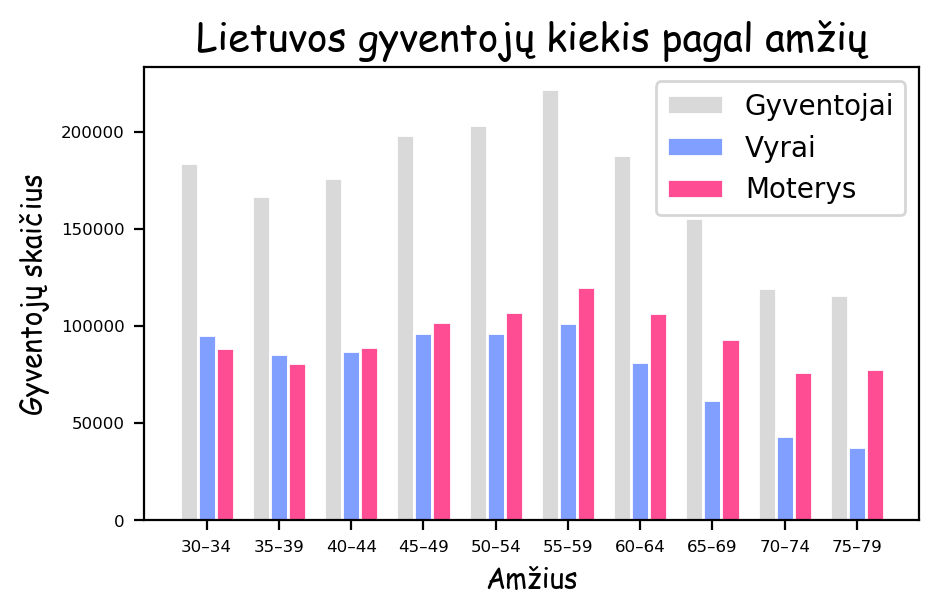

In [14]:
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(valuesA))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(5,3), dpi=200)
 
plt.bar(r1, valuesA, color='#d9d9d9', width=barWidth, edgecolor='white', label='Gyventojai')
plt.bar(r2, valuesM, color='#809fff', width=barWidth, edgecolor='white', label='Vyrai')
plt.bar(r3, valuesW, color='#ff4d94', width=barWidth, edgecolor='white', label='Moterys')
 
plt.title('Lietuvos gyventojų kiekis pagal amžių', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 14})
plt.xlabel('Amžius', {'fontname': 'Comic Sans MS', 'fontsize': 10})
plt.ylabel('Gyventojų skaičius', {'fontname': 'Comic Sans MS', 'fontsize': 10})
plt.xticks([r + barWidth for r in range(len(valuesA))], labels)
plt.tick_params(labelsize=6)

plt.legend()
plt.show()

Atlikus atrajį tyrimą paaiškėjo 10 amžiaus grupių su didžiausiu gyventojų kiekiu, Lietuvoje. Iš gautų rezultatų galima teigti, kad dominuojanti amžiaus grupė, tiek vyrų tiek moterų yra 55-59 metų gyventojai. Antroje vietoje 50-54 metų gyventojai, taip pat vyrai ir moterys. Visgi trečiojoje amžiaus grupėje lyčių duomenys išsiskyria, trečia pagal dydį vyrų amžiaus grupė 45-49 metai, o moterų 60-64 metai.

## 3. Kaip ateityje kis Lietuvos miestų ir kaimų gyventojų skaičius (MM)?

Norint atsakyti į trečiąjį klausimą įtraukiama daugiau duomenų, kuo tiksliau informaciją apie Lietuvos gyventojų kiekį bei pasiskirstymą nuo 2009 iki 2019 metų.

### Trečiojo klausimo duomenų lentelė - Lietuvos gyventojų populiacija 2009 - 2019 metais

In [15]:
df_2009 = pd.read_excel('2009.xls', sheet_name='Iš viso', skiprows=8)
df_2009 = df_2009[['Unnamed: 0', 'Unnamed: 1']]
df_2009 = df_2009.iloc[:3,:]

df_2010 = pd.read_excel('2010.xls', sheet_name='Iš viso', skiprows=8)
df_2010 = df_2010[['Unnamed: 1']]
df_2010 = df_2010.iloc[:3]

df_2011 = pd.read_excel('2011.xls', sheet_name='Iš viso', skiprows=8)
df_2011 = df_2011[['Unnamed: 1']]
df_2011 = df_2011.iloc[:3]

df_2012 = pd.read_excel('2012.xls', sheet_name='Iš viso', skiprows=8)
df_2012 = df_2012[['Unnamed: 1']]
df_2012 = df_2012.iloc[:3]

df_2013 = pd.read_excel('2013.xls', sheet_name='Iš viso', skiprows=8)
df_2013 = df_2013[['Unnamed: 1']]
df_2013 = df_2013.iloc[:3]

df_2014 = pd.read_excel('2014.xls', sheet_name='Iš viso', skiprows=7)
df_2014 = df_2014[['Unnamed: 1']]
df_2014 = df_2014.iloc[:3]

df_2015 = pd.read_excel('2015.xls', sheet_name='Iš viso', skiprows=8)
df_2015 = df_2015[['Unnamed: 1']]
df_2015 = df_2015.iloc[:3]

df_2016 = pd.read_excel('2016.xls', sheet_name='Iš viso', skiprows=7)
df_2016 = df_2016[['Unnamed: 1']]
df_2016 = df_2016.iloc[:3]

df_2017 = pd.read_excel('2017.xls', sheet_name='Iš viso', skiprows=8)
df_2017 = df_2017[['Unnamed: 1']]
df_2017 = df_2017.iloc[:3]

df_2018 = pd.read_excel('2018.xls', sheet_name='Iš viso', skiprows=8)
df_2018 = df_2018[['Unnamed: 1']]
df_2018 = df_2018.iloc[:3]

df_2019 = pd.read_excel('2019.xls', sheet_name='Iš viso', skiprows=8)
df_2019 = df_2019[['Unnamed: 1']]
df_2019 = df_2019.iloc[:3]


df = pd.DataFrame({"Gyvenvietės":df_2009['Unnamed: 0'],"2009":df_2009['Unnamed: 1'],"2010":df_2010['Unnamed: 1'],
                   "2011":df_2011['Unnamed: 1'],"2012":df_2012['Unnamed: 1'],"2013":df_2013['Unnamed: 1'],
                   "2014":df_2014['Unnamed: 1'],"2015":df_2015['Unnamed: 1'],"2016":df_2016['Unnamed: 1'],
                   "2017":df_2017['Unnamed: 1'],"2018":df_2018['Unnamed: 1'],"2019":df_2019['Unnamed: 1']})
df

,Gyvenvietės,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Iš viso,3183856.0,3141976.0,3052588.0,3003641.0,2971905.0,2943472.0,2921262.0,2888558.0,2847904.0,2808901.0,2794184.0
1,Miesto gyventojai,2125433.0,2099064.0,2037126.0,2005604.0,1989268.0,1974580.0,1962613.0,1943228.0,1911068.0,1884722.0,1875370.0
2,Kaimo gyventojai,1058423.0,1042912.0,1015462.0,998037.0,982637.0,968892.0,958649.0,945330.0,936836.0,924179.0,918814.0


Gauti duomenys buvo apdirbti ir sutalpinti į vieną lentelę, kur galima matyti bendrus, miesto ir kaimo gyventojų kiekius nuo 2009 iki 2019 metų.

### Trečiojo klausimo diagrama - Lietuvos bendra, miesto ir kaimo gyventojų populiacija 2009 - 2019 metais

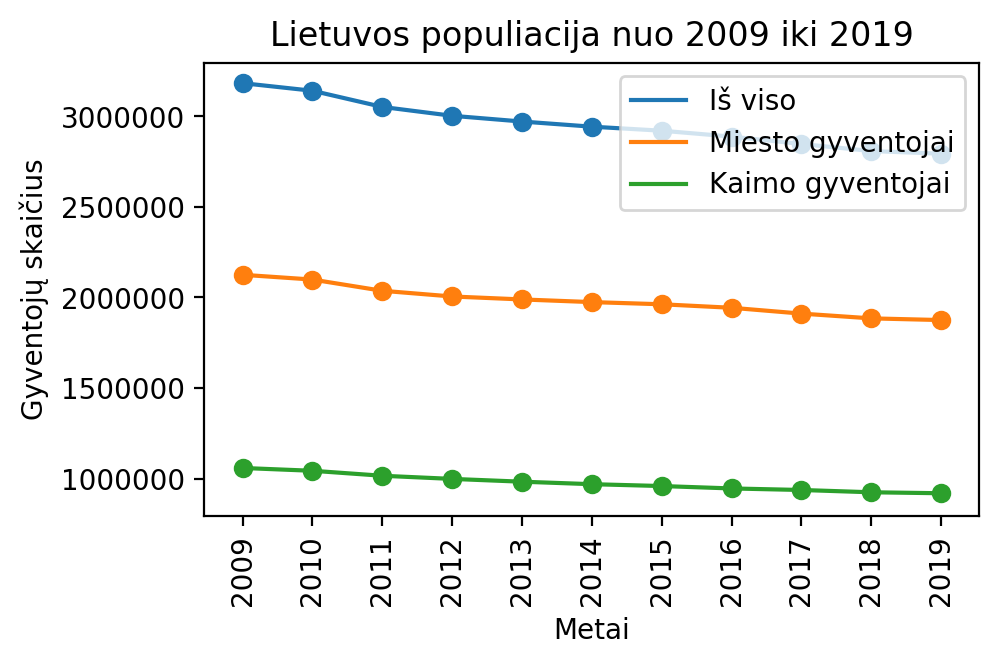

In [16]:
recordA = df[df['Gyvenvietės'] == "Iš viso "]
yearsA = recordA.columns.tolist()[1:]
populationA = recordA.values.tolist()[0][1:]

recordC = df[df['Gyvenvietės'] == "  Miesto gyventojai"]
yearsC = recordC.columns.tolist()[1:]
populationC = recordC.values.tolist()[0][1:]

recordV = df[df['Gyvenvietės'] == "  Kaimo gyventojai"]
yearsV = recordV.columns.tolist()[1:]
populationV = recordV.values.tolist()[0][1:]

plt.figure(figsize=(5,3), dpi=200)

plt.scatter(yearsA, populationA)
plt.plot(yearsA, populationA, label='Iš viso')

plt.scatter(yearsC, populationC)
plt.plot(yearsC, populationC, label='Miesto gyventojai')

plt.scatter(yearsV, populationV)
plt.plot(yearsV, populationV, label='Kaimo gyventojai')

plt.xticks(rotation='vertical')
plt.title('Lietuvos populiacija nuo 2009 iki 2019')
plt.xlabel('Metai')
plt.ylabel('Gyventojų skaičius')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

### Trečiojo klausimo diagrama - Lietuvos gyventojų populiacija 2009 - 2019 metais

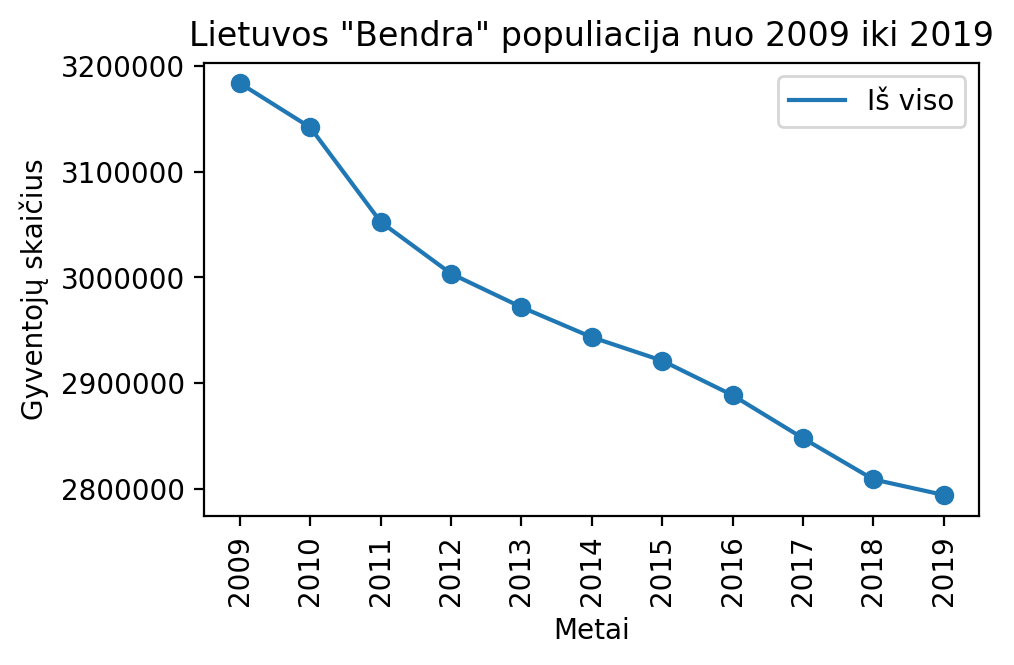

In [17]:
plt.figure(figsize=(5,3), dpi=200)

plt.scatter(yearsA, populationA)
plt.plot(yearsA, populationA, label='Iš viso')

plt.xticks(rotation='vertical')
plt.title('Lietuvos "Bendra" populiacija nuo 2009 iki 2019')
plt.xlabel('Metai')
plt.ylabel('Gyventojų skaičius')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

### Trečiojo klausimo diagrama - Lietuvos miestų gyventojų populiacija 2009 - 2019 metais

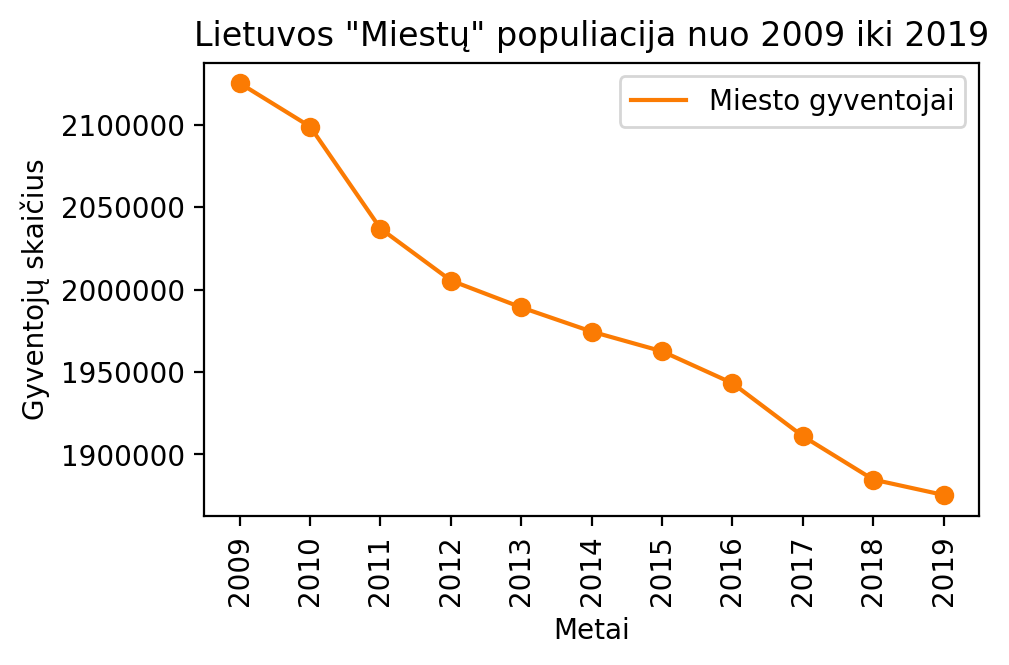

In [18]:
plt.figure(figsize=(5,3), dpi=200)

plt.scatter(yearsC, populationC, color='#FB7B03')
plt.plot(yearsC, populationC, label='Miesto gyventojai', color='#FB7B03')

plt.xticks(rotation='vertical')
plt.title('Lietuvos "Miestų" populiacija nuo 2009 iki 2019')
plt.xlabel('Metai')
plt.ylabel('Gyventojų skaičius')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

### Trečiojo klausimo diagrama - Lietuvos kaimų gyventojų populiacija 2009 - 2019 metais

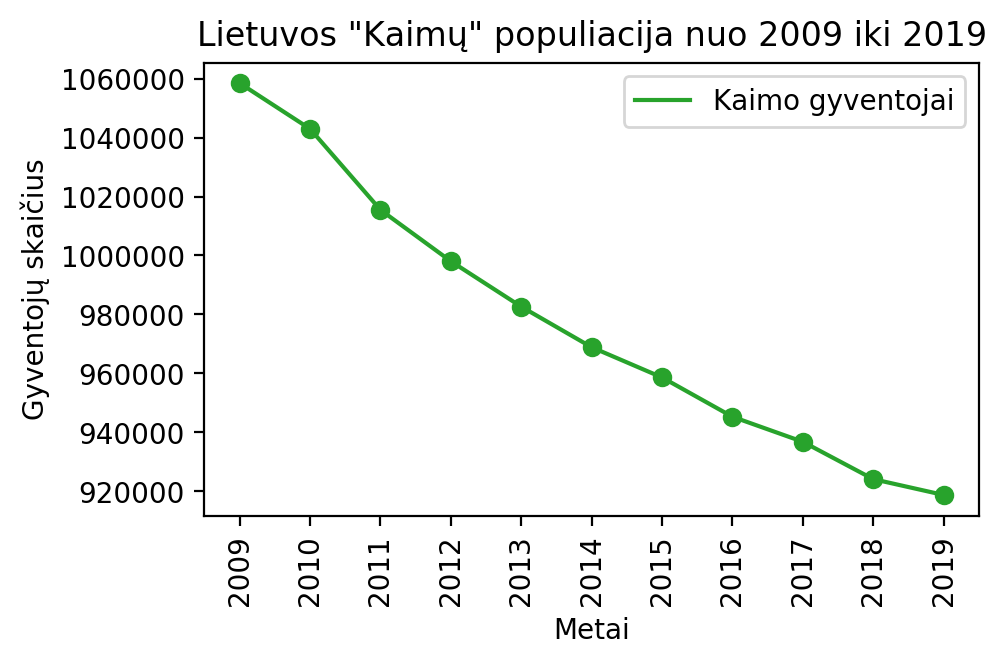

In [19]:
plt.figure(figsize=(5,3), dpi=200)

plt.scatter(yearsV, populationV, color='#28A32C')
plt.plot(yearsV, populationV, label='Kaimo gyventojai', color='#28A32C')

plt.xticks(rotation='vertical')
plt.title('Lietuvos "Kaimų" populiacija nuo 2009 iki 2019')
plt.xlabel('Metai')
plt.ylabel('Gyventojų skaičius')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

Norint atsakyti į trečiajį klausimą bus pasitelktas tiesinės regresijos algoritmas.

Tiesinė regresija - yra mašininio mokymosi algoritmas, pagrįstas prižiūrimu mokymu. Algoritmas atlieka regresijos užduotį. Regresija modeliuoja tikslinę prognozės vertę, pagrįstą nepriklausomais kintamaisiais. Dažniausiai ji naudojama norint sužinoti ryšį tarp kintamųjų ir prognozuoti ateities veiksmus. Skirtingi regresijos modeliai skiriasi priklausomai nuo priklausomų ir nepriklausomų kintamųjų santykio, kurį jie nagrinėja, ir naudojamų nepriklausomų kintamųjų skaičiaus.

https://www.geeksforgeeks.org/ml-linear-regression/

### Trečiojo klausimo duomenų lentelė - Lietuvos gyventojų populiacija 2009 - 2024 metais

In [20]:
countries = df['Gyvenvietės'].tolist()
temp_df = pd.DataFrame()
for country in countries:
    record = df[df['Gyvenvietės'] == country].drop(['Gyvenvietės'], axis=1)
    record = record.T
    record.reset_index(inplace=True)
    record.columns = ['Year', 'Population']
    X = record['Year']
    Y = record['Population']

    regressor = LinearRegression()
    regressor.fit(np.array(X).reshape(-1,1), Y)

    for year in range(2020,2025):
            future_population = round(regressor.predict(np.array([year]).reshape(-1,1))[0])
            row = pd.DataFrame([[year,future_population]], columns=['Year','Population'])
            record = record.append(row, ignore_index=True)
        
    record = record.T
    record = record[1:]
    record.columns = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']

    record.index = [country]
    temp_df = pd.concat([temp_df, record])
temp_df


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Iš viso,3.18386e+06,3.14198e+06,3.05259e+06,3.00364e+06,2.97190e+06,2.94347e+06,2.92126e+06,2.88856e+06,2.8479e+06,2.8089e+06,2.79418e+06,2.73208e+06,2.69413e+06,2.65617e+06,2.61821e+06,2.58025e+06
Miesto gyventojai,2.12543e+06,2.09906e+06,2.03713e+06,2.0056e+06,1.98927e+06,1.97458e+06,1.96261e+06,1.94323e+06,1.91107e+06,1.88472e+06,1.87537e+06,1.8387e+06,1.81473e+06,1.79075e+06,1.76678e+06,1.7428e+06
Kaimo gyventojai,1.05842e+06,1.04291e+06,1.01546e+06,998037,982637,968892,958649,945330,936836,924179,918814,893383,879399,865415,851431,837447


### Trečiojo klausimo diagrama - Lietuvos bendra, miesto ir kaimo gyventojų populiacija 2009 - 2024 metais

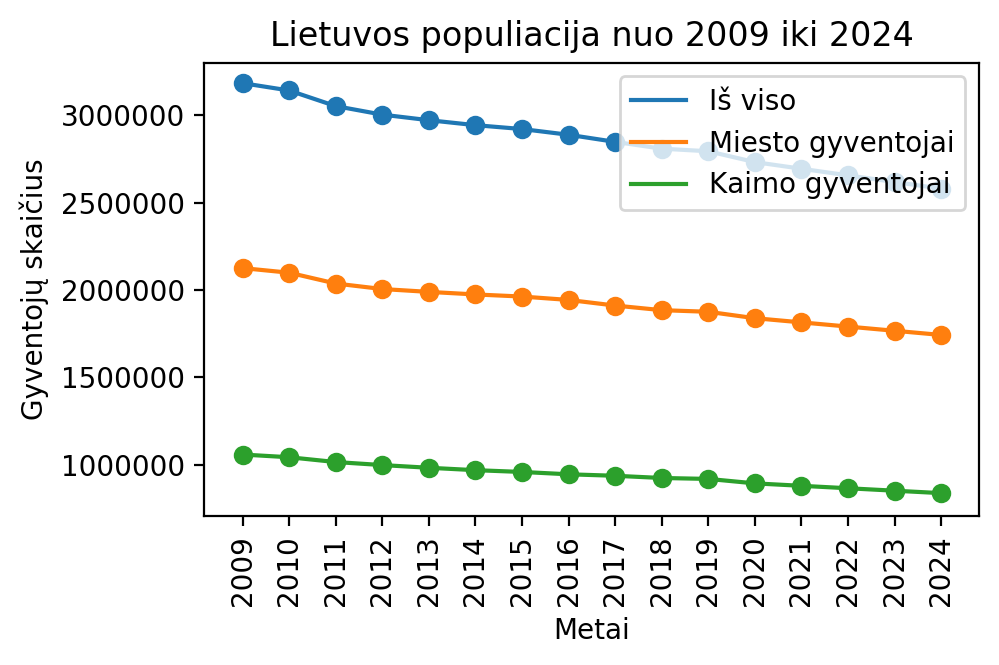

In [21]:
df = temp_df
recordA = df[df['2009'] == 3183856]
yearsA = recordA.columns.tolist()[:]
populationA = recordA.values.tolist()[0][:]

recordC = df[df['2009'] == 2125433]
yearsC = recordC.columns.tolist()[:]
populationC = recordC.values.tolist()[0][:]

recordV = df[df['2009'] == 1058423]
yearsV = recordV.columns.tolist()[:]
populationV = recordV.values.tolist()[0][:]

plt.figure(figsize=(5,3), dpi=200)

plt.scatter(yearsA, populationA)
plt.plot(yearsA, populationA, label='Iš viso')

plt.scatter(yearsC, populationC)
plt.plot(yearsC, populationC, label='Miesto gyventojai')

plt.scatter(yearsV, populationV)
plt.plot(yearsV, populationV, label='Kaimo gyventojai')

plt.xticks(rotation='vertical')
plt.title('Lietuvos populiacija nuo 2009 iki 2024')
plt.xlabel('Metai')
plt.ylabel('Gyventojų skaičius')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.show()


### Trečiojo klausimo diagrama - Lietuvos gyventojų populiacija 2009 - 2024 metais

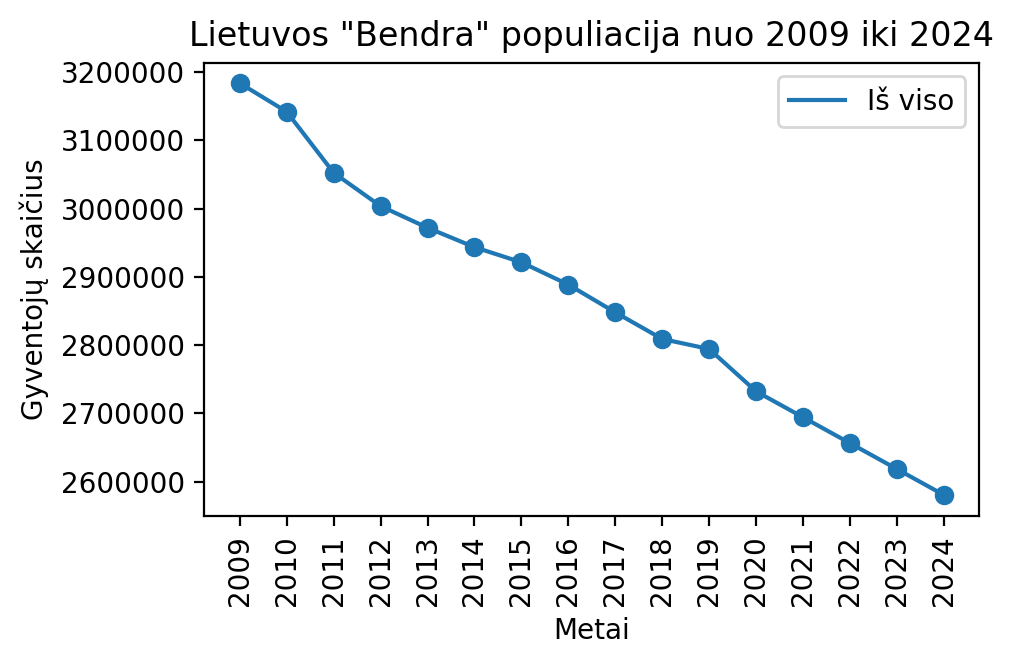

In [22]:
plt.figure(figsize=(5,3), dpi=200)

plt.scatter(yearsA, populationA)
plt.plot(yearsA, populationA, label='Iš viso')

plt.xticks(rotation='vertical')
plt.title('Lietuvos "Bendra" populiacija nuo 2009 iki 2024')
plt.xlabel('Metai')
plt.ylabel('Gyventojų skaičius')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

### Trečiojo klausimo diagrama - Lietuvos miestų gyventojų populiacija 2009 - 2024 metais

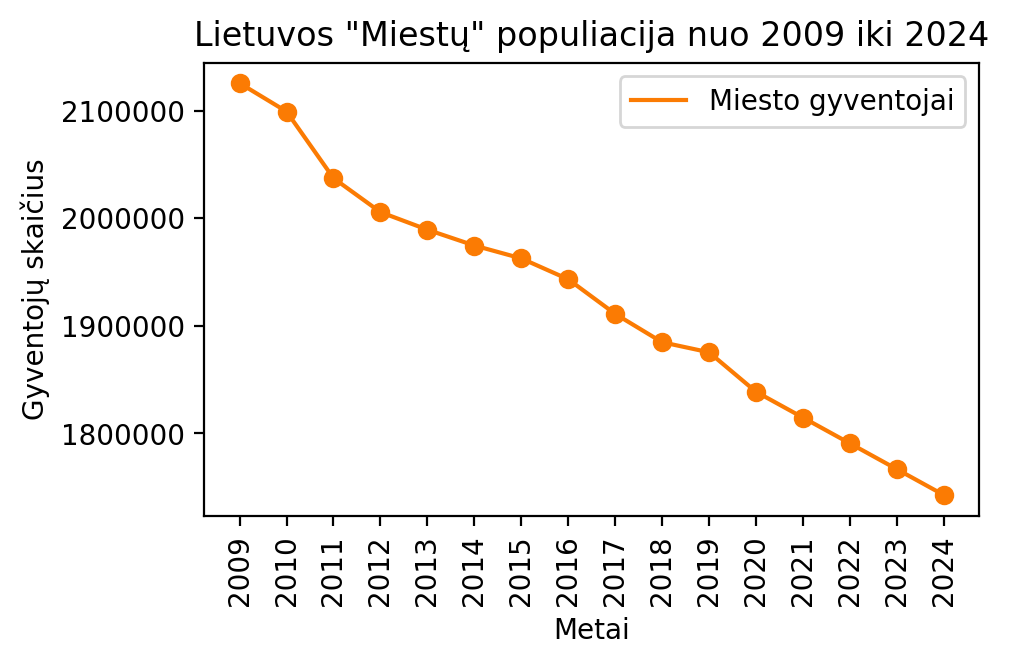

In [23]:
plt.figure(figsize=(5,3), dpi=200)

plt.scatter(yearsC, populationC, color='#FB7B03')
plt.plot(yearsC, populationC, label='Miesto gyventojai', color='#FB7B03')

plt.xticks(rotation='vertical')
plt.title('Lietuvos "Miestų" populiacija nuo 2009 iki 2024')
plt.xlabel('Metai')
plt.ylabel('Gyventojų skaičius')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

### Trečiojo klausimo diagrama - Lietuvos kaimų gyventojų populiacija 2009 - 2024 metais

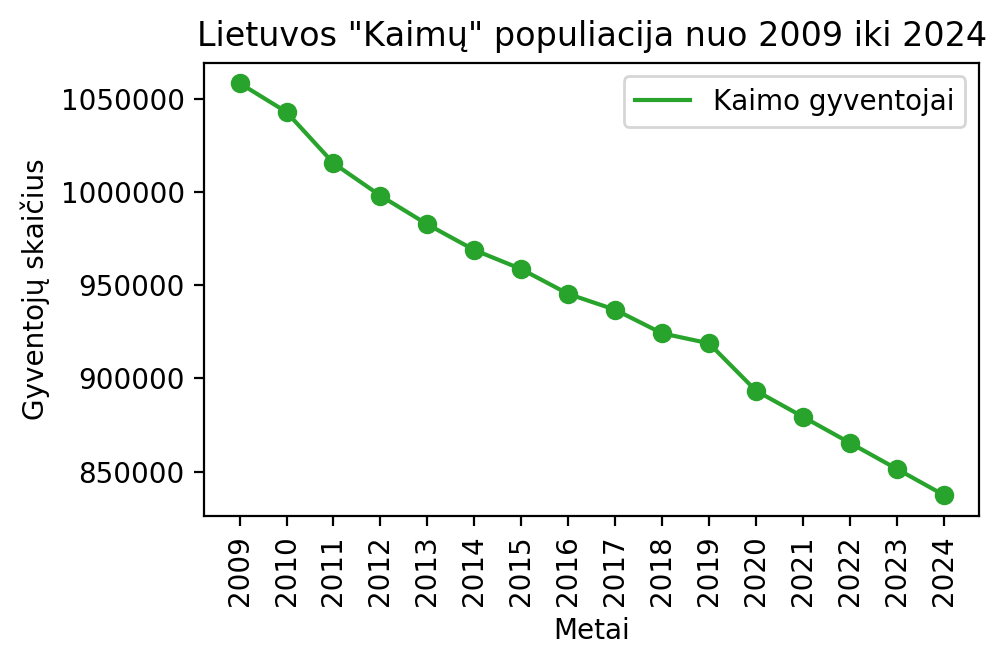

In [24]:
plt.figure(figsize=(5,3), dpi=200)

plt.scatter(yearsV, populationV, color='#28A32C')
plt.plot(yearsV, populationV, label='Kaimo gyventojai', color='#28A32C')

plt.xticks(rotation='vertical')
plt.title('Lietuvos "Kaimų" populiacija nuo 2009 iki 2024')
plt.xlabel('Metai')
plt.ylabel('Gyventojų skaičius')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

Pasinaudojus tiesinės regresijos algoritmu buvo bandyta nuspėti Lietuvos gyventojų kiekį ateinantiems penkiems metams. Iš gautų rezultatų spėjama, kad Lietuvos gyventojų kiekis ir toliau spačiai kris.

Remiantis visais trim išsikeltų klausimų atsakymais galima daryti išvadas, kad Lietuvos valstybė pamažu tampa "pasenusia". Dominuojančios amžiaus grupės yra pensinio amžiaus žmonės, dauguma jų dirbti nebegalinčios moterys. O krintantis gyventojų skaičius parodo, kad jaunesnio amžiaus žmonės, nėra linkę anksti pradėti šeimas, arba ieško geresnio pragyvenimo svetur ir migruoja iš savo gimtinės.